### PS4



**Problem 4.1**

If $A$ is a citation matrix with $a_{ij}$ as its entries, where $i$ and $j$ are indexes of papers, such that $a_{ij}=1$ when $i$ is *cited by* $j$. 

**(a)**

$B = AA^T$ with entires $b_{ij}$ is the co-citation adjacency matrix. Each entry contains the number of papers that cite both paper $i$ and $j$.


**(b)**

$C = A^TA$ with entires $c_{ij}$ is the bibliographic coupling adjacency matrix. Each entry contains the number of papers that are cited by both paper $i$ as well as $j$.

**(c)**

They give different results for a few reasons. The co-citation matrix can evolve over time and contains more entries, as more people continue to cite both the papers. In a field there can be some highly decorated works that are similar and cited by a lot of further research. The biblographic coupling on the other hand is fixed because it refers to past research, and has a smaller body of work that can be cited.  

Both can be useful metrics to determine similarity and a combination of the results of the two matrices should be seen (maybe a weighted sum or a index-wise product). However, if I had to pick one- it would be the cocitation matrix. If a lot of papers in the future keep citing two papers among a growing body of work, it is highly likely they are similar. Meanwhile a bibliographic matrix could just identify some of the main works in the field that a lot of papers (including the two under consideration) cite.

 **Problem 4.2(a)**

In [2]:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import seaborn as sns

phase1= pd.read_csv('CAVIAR_Phases/phase1.csv', index_col=0)
phase2= pd.read_csv('CAVIAR_Phases/phase2.csv', index_col=0)

deg= []
bet= []
eig= []
data=[]
x=str(0)

for i in range(1,12):
    x=str(i)+".csv"
    #print(x)
    phase = pd.read_csv('CAVIAR_Phases/phase'+x, index_col=0)
    colnames=list(phase.columns.values)
    Dict={}
    for i in range(len(colnames)):
        Dict[i]=colnames[i]
    G=nx.DiGraph(phase.values, with_labels = True)
    G=nx.relabel_nodes(G,Dict)
    data.append(G)

G = data[0]

#degre_dict['1']

#nx.draw(G)


In [3]:
suspects= ['1','3','83','86','85','6','11','88','106','89','84','5','8','76','77','87','82','96','12','17','80','33','16']

degrees= pd.DataFrame(columns=(suspects), index=range(0,11))
for j in range (0,11):
    degree_phase = nx.degree(data[j])
    for i in (suspects):
        try:
            degrees[i][j]=degree_phase[i]
        except:
            degrees[i][j]=0
    
degrees.loc['Average']= degrees.sum()/11
degrees=degrees.transpose()
degrees=degrees.sort_values('Average', ascending= False)

degrees

,0,1,2,3,4,5,6,7,8,9,10,Average
1,16,25,36,32,29,30,33,29,14,21,12,25.1818
3,4,3,12,10,7,18,11,17,16,2,1,9.18182
12,0,1,2,2,10,17,6,12,12,9,18,8.09091
76,0,2,3,3,3,10,8,7,6,4,10,5.09091
85,5,2,4,9,4,6,5,5,5,4,5,4.90909
87,0,0,0,0,0,2,4,13,12,14,7,4.72727
83,2,2,10,10,3,3,4,1,1,3,1,3.63636
82,0,0,0,0,2,2,0,2,9,8,7,2.72727
8,1,4,2,4,2,5,1,3,4,3,0,2.63636
88,8,4,2,3,2,0,2,0,1,0,1,2.09091


        The Table above shows the values of all degrees for suspects (y) over phases (x)

In [4]:
betweenness= pd.DataFrame(columns=(suspects), index=range(0,11))
for j in range (0,11):
    betweenness_phase = nx.betweenness_centrality(data[j])
    for i in (suspects):
        try:
            betweenness[i][j]=betweenness_phase[i]
        except:
            betweenness[i][j]=0
            
betweenness.loc['Average']= betweenness.sum()/11
betweenness=betweenness.transpose()
betweenness=betweenness.sort_values('Average', ascending= False)
betweenness

,0,1,2,3,4,5,6,7,8,9,10,Average
1,0.387363,0.34585,0.334341,0.428931,0.372043,0.450513,0.318487,0.300813,0.0929609,0.206707,0.107372,0.304126
12,0,0,0,0,0.112366,0.305641,0.00336134,0.170732,0.187658,0.0152439,0.120726,0.083248
3,0,0,0.0512433,0.0645161,0.0919355,0.125128,0.0239496,0.125711,0.313605,0,0,0.0723717
76,0,0,0,0,0,0.0733333,0.0773109,0.0377033,0.0980114,0.0329268,0.0323718,0.0319689
87,0,0,0,0,0,0,0,0.0912602,0.151042,0.0707317,0.0108974,0.0294483
85,0.00824176,0,0,0.0863575,0.0419355,0.00230769,0.0256303,0,0.0326705,0.0158537,0.0025641,0.0195964
89,0.0989011,0.0326087,0,0.0826613,0,0,0,0,0,0,0,0.0194701
82,0,0,0,0,0,0,0,0,0.088226,0.0493902,0.0314103,0.015366
88,0.0851648,0.0444664,0,0,0,0,0,0,0,0,0,0.0117847
83,0,0,0.0213374,0.0650202,0.0193548,0,0,0,0,0.0103659,0,0.0105526


        The Table above shows the values of all betweenness centralities for suspects (y) over phases (x)

In [5]:
eigen_centrality= pd.DataFrame(columns=(suspects), index=range(0,11))
for j in range (0,11):
    eigen_phase = nx.eigenvector_centrality(data[j])
    for i in (suspects):
        try:
            eigen_centrality[i][j]=eigen_phase[i]
        except:
            eigen_centrality[i][j]=0

eigen_centrality.loc['Average']= eigen_centrality.sum()/11
eigen_centrality=eigen_centrality.transpose()
eigen_centrality=eigen_centrality.sort_values('Average', ascending= False)

eigen_centrality

,0,1,2,3,4,5,6,7,8,9,10,Average
1,0.469658,0.477329,0.46321,0.442196,0.469624,0.537529,0.514212,0.451554,0.424935,0.505938,0.426256,0.471131
3,0.335413,0.188748,0.295962,0.275366,0.30563,0.401055,0.18386,0.40222,0.322402,0.143575,4.56392e-44,0.259475
85,0.335413,1.34136e-09,0.227458,0.379397,0.173268,0.199379,0.209441,0.217421,0.209178,0.184318,0.243606,0.216262
76,0,0.188748,0.11986,0.222663,0.154512,0.341037,0.26238,0.114992,0.211156,0.19588,0.325083,0.19421
8,0.163082,0.263384,0.178718,0.194469,0.154512,0.265988,0.143701,0.272789,0.209178,0.143575,0,0.180854
83,2.21035e-12,0.188748,0.216181,0.237031,0.173268,0.199379,0.270745,0.114992,0.118938,0.143575,4.56392e-44,0.151169
82,0,0,0,0,0.154512,0.114185,0,0.217421,0.373054,0.38131,0.275009,0.137772
87,0,0,0,0,0,9.69891e-13,0.143701,0.279796,0.404375,0.29248,0.332772,0.132102
12,0,1.34136e-09,0.196443,0.0746273,0.286034,0.280844,4.48385e-07,0.0636224,0.117969,9.10382e-06,0.329563,0.122647
88,0.496295,0.188748,6.28039e-09,0.222663,0.0570069,0,0.109912,0,3.68927e-17,0,0.105402,0.107275


    The Table above shows the values of all eigenvector centralities for suspects (y) over phases (x)

**Problem 4.2(b)**

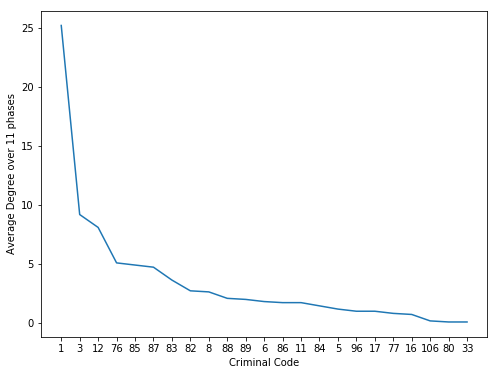

In [6]:
plt.figure(figsize=(8,6))
plt.plot(degrees['Average'])
plt.xlabel('Criminal Code')
plt.ylabel('Average Degree over 11 phases')
plt.show()

    The above graph shows the average degrees in descending order from most connected to least connected

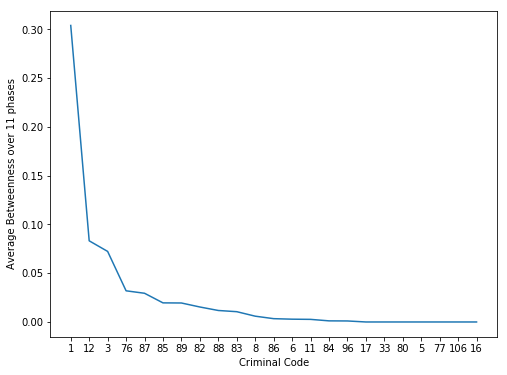

In [7]:
plt.figure(figsize=(8,6))
plt.plot(betweenness['Average'])
plt.xlabel('Criminal Code')
plt.ylabel('Average Betweenness over 11 phases')
plt.show()


    The graph above shows the average betweenness centrality in descending order from most to least connected

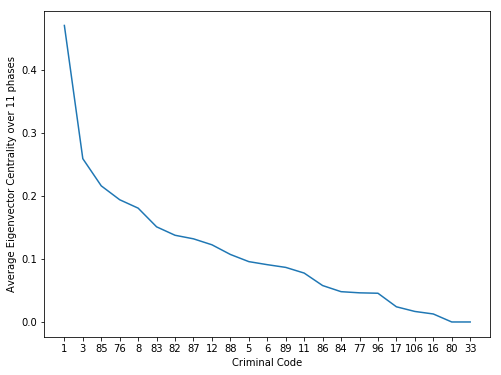

In [8]:

plt.figure(figsize=(8,6))
plt.plot(eigen_centrality['Average'])
plt.xlabel('Criminal Code')
plt.ylabel('Average Eigenvector Centrality over 11 phases')
plt.show()


        This graph shows the average eigen centrality in descending order from most connected to least connected

Serero, Daniel (n1; Mastermind of the network) appears in all 3 measures of importance in the criminal network.
Pierre Perlini (n3; Principal lieutenant of Serero) also is part of the top 3 in all measurements.

So Serero is likely the kingpin and Perlini his deputy.

In the Top 5, Ernesto Morales (n12; Principal organizer of the cocaine import) occurs twice.

Gabrielle Casale (n76; Charged with recuperating the marijuana) also occurs in the top 4 of all metrics. Gleeson(n5) and Quinzio (n8) alongwith Casale are in charge of marijuana but only Casale shows up in the top by these metrics- suggesting that he may be more important than them.

Wallace Lee (n85; accountant occurs in the top 6 of all metrics)

These all seem to serve three different important roles- Morales is important in cocaine business, Casale in marijuana. Morales and Casale alternate in importance based on what kind of shipment is caught. 
Lee is important for finances. Interestingly, his eigenvector centrality is higher than other measures- he has friends who has friends, although he isn't directly connected as much.


**Problem 4.2(c)**

In [9]:
node=[]
for e in range(1,111):
        node.append(str(e))
        

degrees= pd.DataFrame(index=range(0,11), columns=(node))
for j in range (0,11):
    degree_phase = nx.degree(data[j])
    for i in node:
        if i not in suspects:
            try:
                degrees[i][j]=degree_phase[i]
            except:
                degrees[i][j]=0
   
    
degrees.loc['Average']= degrees.sum()/11
degrees=degrees.transpose()
degrees=degrees.sort_values('Average', ascending= False)

#node
degrees.head()

#plt.figure(figsize=(8,6))
#plt.plot(degrees['Average'])
#plt.xlabel('Criminal Code')
#plt.ylabel('Average Degree over 11 phases')
#plt.show()


,0,1,2,3,4,5,6,7,8,9,10,Average
2,1,2,3,2,2,3,3,6,1,0,0,2.09091
9,0,1,6,4,2,2,4,2,0,1,0,2
37,0,0,0,0,0,0,0,3,1,13,5,2
14,0,0,0,1,0,3,1,6,1,6,4,2
19,0,0,0,0,2,4,6,3,0,1,0,1.45455


    These are the top 5 non-suspects in terms of degree

In [10]:
betweenness= pd.DataFrame(columns=(node), index=range(0,11))
for j in range (0,11):
    betweenness_phase = nx.betweenness_centrality(data[j])
    for i in (node):
        if i not in suspects:
            try:
                betweenness[i][j]=betweenness_phase[i]
            except:
                betweenness[i][j]=0
            
betweenness.loc['Average']= betweenness.sum()/11
betweenness=betweenness.transpose()
betweenness=betweenness.sort_values('Average', ascending= False)
betweenness

betweenness.head()

,0,1,2,3,4,5,6,7,8,9,10,Average
14,0,0,0,0,0,0,0,0.15752,0,0.00853659,0.0314103,0.0179516
41,0,0,0,0,0,0,0,0,0,0,0.105556,0.00959596
37,0,0,0,0,0,0,0,0,0,0.0859756,0.000534188,0.00786453
79,0,0,0,0,0,0,0,0,0.0596591,0,0.0195513,0.00720094
78,0,0,0,0,0,0,0.0193277,0,0.0539773,0,0,0.00666409


    These are the top 5 non suspects in terms of betweenness centrality

In [11]:
eigen_centrality= pd.DataFrame(columns=(node), index=range(0,11))
for j in range (0,11):
    eigen_phase = nx.eigenvector_centrality(data[j])
    for i in (node):
        if i not in suspects:
            try:
                eigen_centrality[i][j]=eigen_phase[i]
            except:
                eigen_centrality[i][j]=0

eigen_centrality.loc['Average']= eigen_centrality.sum()/11
eigen_centrality=eigen_centrality.transpose()
eigen_centrality=eigen_centrality.sort_values('Average', ascending= False)

eigen_centrality.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,Average
9,0,0.188748,0.227458,0.276896,0.194667,0.144854,0.270745,0.186244,0,0.0407434,0,0.139123
2,0.163082,0.188748,0.11986,0.119841,0.154512,0.114185,0.195082,0.15086,0.0902398,0,0,0.117855
4,0.163082,0,6.28039e-09,0.119841,0.154512,0.114185,0.143701,0.114992,0,0.143575,0,0.0867171
81,0,0,0,0,0,0,0.18386,0.186244,0.113183,0.226574,0.107894,0.0743414
19,0,0,0,0,0.154512,0.18663,0.322923,0.144275,0,5.24683e-19,0,0.0734855


    These are the top 5 non suspects in terms of eigenvector centrality

While none of these actors listed above have high enough values for degree or centrality to compare to the top 5 suspects. However they do figure near the top 10 compared to the suspects, so these people maybe worth including in suspects.

It might be worthwhile to include n14 in the suspects list because his/hers betweenness centrality would be 8th (averaged over phases). This means that many people are connected through n14. The degree for n14 is also reasonably high.

n9 is 7th by eigenvector centrality so he/she has friends who has friends- might be worthwhile to include him/her in suspects to see who n9 is connected to. n9 also has a degree of 2 which would put him/her in the top 15 compared to suspects, so might be useful to examine n9 closely.

n2, like n9, figures high on both eigenvector centrality and degree. Comparatively both of them are lower according to betweenness suggesting that they may be important in isolated/separated networks within the larger network.

**Problem 4.2(d)**

First let us look at whether total communication in the network is affected by seizures of drugs

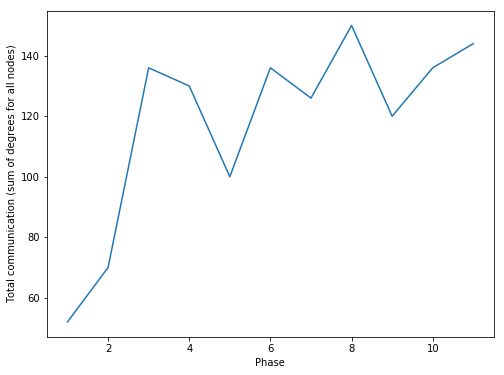

In [12]:
degrees= pd.DataFrame(index=range(0,11), columns=(node))
for j in range (0,11):
    degree_phase = nx.degree(data[j])
    for i in node:
        try:
            degrees[i][j]=degree_phase[i]
        except:
            degrees[i][j]=0

degrees=degrees.transpose()    
degrees.loc['Phase_Sum']= degrees.sum()
degrees=degrees.transpose()    

#degrees.reset_index()
#degrees.reindex(index=range(1,12))
degrees.index=range(1,12)

plt.figure(figsize=(8,6))
plt.plot(degrees['Phase_Sum'])
plt.xlabel('Phase')
plt.ylabel('Total communication (sum of degrees for all nodes)')
#plt.axvline(x=6, color='red', linestyle='--')
#plt.axvline(x=9, color='red', linestyle='--')
plt.show()
#degrees=degrees.sort_values('Average', ascending= False)

#degrees

It doesn't seem that there is an overall decrease in communication. After the first seizure, there is a decrease in communication (maybe due to fear of arrest) but then communication goes up again (maybe because no arrests).

**Problem 4.2(e)**

Now lets analyse those who were identified in the earlier question. First lets look at those charged with recuperating the marijuana ( Casale (n76), Gleeson(n5) and Quinzio (n8) ) and see if the seizures had any effect on their communication

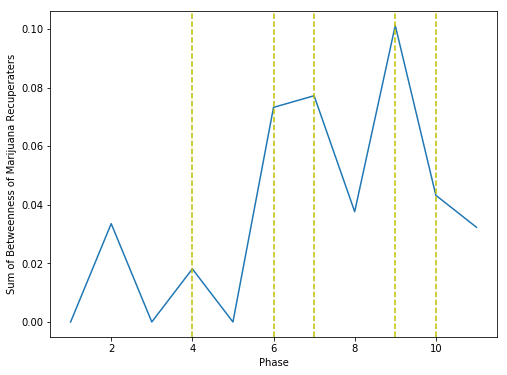

In [13]:
betweenness= pd.DataFrame(columns=['76','5','8'], index=range(0,11))
for j in range (0,11):
    betweenness_phase = nx.betweenness_centrality(data[j])
    for i in ['76','5','8']:
        try:
            betweenness[i][j]=betweenness_phase[i]
        except:
            betweenness[i][j]=0

                                   
betweenness=betweenness.transpose()
betweenness.loc['Phase_Sum']= betweenness.sum()
betweenness=betweenness.transpose()
#betweenness=betweenness.sort_values('Phase_Sum', ascending= False)
                                                                   
betweenness.index=range(1,12)
plt.figure(figsize=(8,6))
plt.plot(betweenness['Phase_Sum'])
plt.xlabel('Phase')
plt.ylabel('Sum of Betweenness of Marijuana Recuperaters')
plt.axvline(x=4, color='y', linestyle='--')
plt.axvline(x=6, color='y', linestyle='--')
plt.axvline(x=7, color='y', linestyle='--')
plt.axvline(x=9, color='y', linestyle='--')
plt.axvline(x=10, color='y', linestyle='--')


The yellow lines are marijuana seizures. You can see that there is a decrease in communication (when measured by betweenness) after every time there is a seizure of marijuana.

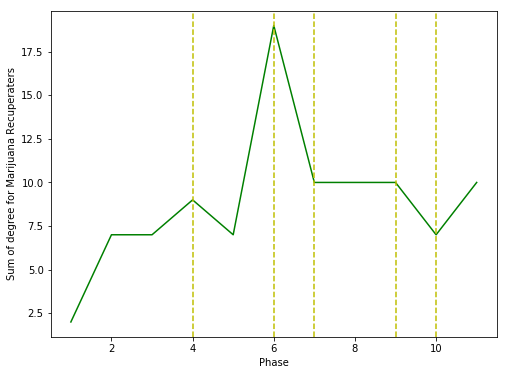

In [14]:
degrees= pd.DataFrame(index=range(0,11), columns=['76','5','8'])
for j in range (0,11):
    degree_phase = nx.degree(data[j])
    for i in ['76','5','8']:
        try:
            degrees[i][j]=degree_phase[i]
        except:
            degrees[i][j]=0

degrees=degrees.transpose()    
degrees.loc['Phase_Sum']= degrees.sum()
degrees=degrees.transpose()    

#degrees.reset_index()
#degrees.reindex(index=range(1,12))
degrees.index=range(1,12)

plt.figure(figsize=(8,6))
plt.plot(degrees['Phase_Sum'], color= 'green')
plt.xlabel('Phase')
plt.ylabel('Sum of degree for Marijuana Recuperaters')
plt.axvline(x=4, color='y', linestyle='--')
plt.axvline(x=6, color='y', linestyle='--')
plt.axvline(x=7, color='y', linestyle='--')
plt.axvline(x=9, color='y', linestyle='--')
plt.axvline(x=10, color='y', linestyle='--')
plt.show()
#degrees=degrees.sort_values('Average', ascending= False)

#degrees

This is communication between marijuana gang members when measured by degree

It feels like betweenness is a measure that better fits the story. This is perhaps due to the fact that in a criminal network, the degree (no. of immediate connections) isn't as important as being connected to everyone through paths.

Now let's analyse the effect of seizures on Morales (n12), organiser of the cocaine import

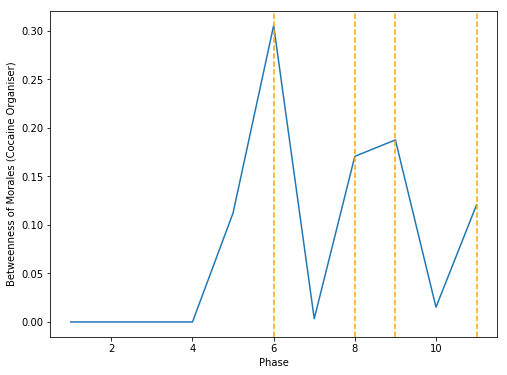

In [15]:
betweenness= pd.DataFrame(columns=['12'], index=range(0,11))
for j in range (0,11):
    betweenness_phase = nx.betweenness_centrality(data[j])
    for i in ['12']:
        try:
            betweenness[i][j]=betweenness_phase[i]
        except:
            betweenness[i][j]=0

                                   
betweenness=betweenness.transpose()
#betweenness.loc['Phase_Sum']= betweenness.sum()
betweenness=betweenness.transpose()                                                                   
betweenness.index=range(1,12)

plt.figure(figsize=(8,6))
plt.plot(betweenness['12'])
plt.xlabel('Phase')
plt.ylabel('Betweenness of Morales (Cocaine Organiser)')

plt.axvline(x=6, color='orange', linestyle='--')
plt.axvline(x=8, color='orange', linestyle='--')
plt.axvline(x=9, color='orange', linestyle='--')
plt.axvline(x=11, color='orange', linestyle='--')

Even for Cocaine, it seems like every time there is a seizure, there is a reduction in influence/communication through Morales. However comunication resumes after one more phase (when not seized)!

**Problem 4.2(f)**

Now let us observe what is the behaviour of the kingpin at different phases

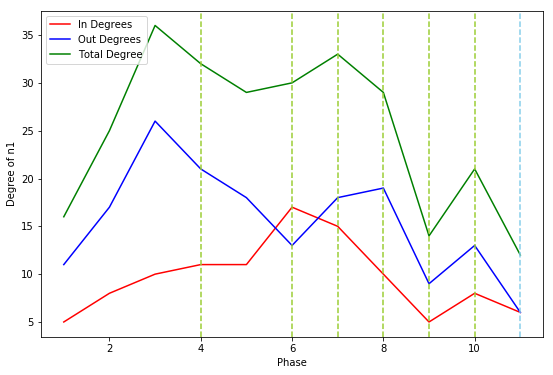

In [20]:
in_degrees= pd.DataFrame(index=range(0,11), columns=['1'])
for j in range (0,11):
    degree_phase = (data[j]).in_degree
    for i in ['1']:
        try:
            in_degrees[i][j]=degree_phase[i]
        except:
            in_degrees[i][j]=0

in_degrees.index=range(1,12)

out_degrees= pd.DataFrame(index=range(0,11), columns=['1'])
for j in range (0,11):
    degree_phase = (data[j]).out_degree
    for i in ['1']:
        try:
            out_degrees[i][j]=degree_phase[i]
        except:
            out_degrees[i][j]=0
    
out_degrees.index=range(1,12)

plt.figure(figsize=(9,6))
plt.plot(in_degrees['1'], color = 'red', label= 'In Degrees')
plt.plot(out_degrees['1'], color = 'blue', label= 'Out Degrees')
plt.plot(in_degrees['1']+out_degrees['1'], color = 'green', label= 'Total Degree')
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Degree of n1')

#plt.hold(True)

line1=plt.axvline(x=6, color='yellowgreen', linestyle='--')
line2=plt.axvline(x=8, color='yellowgreen', linestyle='--')
line3=plt.axvline(x=4, color='yellowgreen', linestyle='--')
plt.axvline(x=9, color='yellowgreen', linestyle='--')
plt.axvline(x=11, color='skyblue', linestyle='--')
plt.axvline(x=7, color='yellowgreen', linestyle='--')
plt.axvline(x=10, color='yellowgreen', linestyle='--')

#plt.legend([line1, line2, line3],['Both Seized','Only Cocaine Seized','Only Marijuana Seized'])



While n1 seems to have decreased degree over time, the entire network had increasing degree. Maybe this means that n1 is isolating himself and more people are communicating in other parts of the network to keep business running. n1 had increasing degree until the first interception by the police.

In the period after the first seizure of drugs, n1 has decreasing communications outward but more communication inward.
One possible explanation is that more people are calling him to ask about what to do but he doesn't want to call people because he is afraid of there being a rat.


**Problem 4.2(g)**

Now lets look at activity of both Cocaine and Marijuana dealers at different periods. We will plot the periods where the police seized shipments on the same graph to examine the effect of the police action.

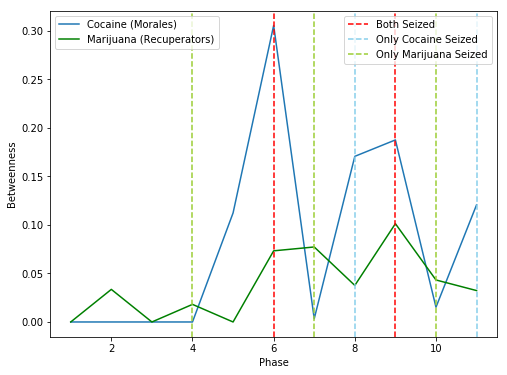

In [125]:
betweenness= pd.DataFrame(columns=['12','76','5','8'], index=range(0,11))
for j in range (0,11):
    betweenness_phase = nx.betweenness_centrality(data[j])
    for i in ['12','76','5','8']:
        try:
            betweenness[i][j]=betweenness_phase[i]
        except:
            betweenness[i][j]=0

                                   
betweenness=betweenness.transpose()
#betweenness.loc['Phase_Sum']= betweenness.sum()
betweenness=betweenness.transpose()                                                                   
betweenness.index=range(1,12)

plt.figure(figsize=(8,6))
coc=plt.plot(betweenness['12'],label='Cocaine (Morales)')
mar=plt.plot(betweenness['76']+betweenness['5']+betweenness['8'], color= 'green', label='Marijuana (Recuperators)')
plt.xlabel('Phase')
plt.ylabel('Betweenness')

line1=plt.axvline(x=6, color='red', linestyle='--')
line2=plt.axvline(x=8, color='skyblue', linestyle='--')
line3=plt.axvline(x=4, color='yellowgreen', linestyle='--')
plt.axvline(x=9, color='red', linestyle='--')
plt.axvline(x=11, color='skyblue', linestyle='--')
plt.axvline(x=7, color='yellowgreen', linestyle='--')
plt.axvline(x=10, color='yellowgreen', linestyle='--')

legend1=plt.legend([line1, line2, line3],['Both Seized','Only Cocaine Seized','Only Marijuana Seized'], loc=1)
plt.legend()
plt.gca().add_artist(legend1)
plt.show()


As you can see, when both cocaine and marijuana is seized, betweenness for both cocaine and marijuana organisers goes down showing that there is less communication. It is interesting to note that, when only marijuana is seized, while marijuana betweenness reduces, cocaine betweenness goes up. This suggests that the criminal network changes the drug its dealing after one of the drugs gets seized by authorities. 

The police didn't decrease drug trading overall but only displaced communication from one drug to the other every time they seized a particular drug. So different parts of the criminal network are more active based on whether there has been interception by the police. The overall communication of the kingpin seems to have decreased over time, suggesting that the network gets more scattered.




**Problem 4.3 (a,b,c,d)

In [21]:
cooffend= pd.read_csv('Cooffending.csv')

In [22]:
print ('No. of cases: {}'.format(len(cooffend['NoUnique'])))

No. of cases: 1280459


In [23]:
print ('No. of unique offenders: {}'.format(len(set(cooffend['NoUnique']))))

No. of unique offenders: 539593


In [24]:
print ('No. of unique events: {}'.format(len(set(cooffend['SeqE']))))

No. of unique events: 1164836


In [25]:
from collections import Counter
print ('No of events per year')
sorted(Counter(cooffend['annee']).items())
#print ('No. of unique events: {}'.format((cooffend['annee'].count(str(i)))))

No of events per year


[(2003, 122284),
 (2004, 133705),
 (2005, 188115),
 (2006, 203381),
 (2007, 214315),
 (2008, 220791),
 (2009, 197861),
 (2010, 7)]

In [131]:
print ('Event with most offenders (Event No., No. of people involved)')
print (Counter(cooffend['SeqE']).most_common(1))


Event with most offenders (Event No., No. of people involved)
[(27849, 156)]


In [132]:
a=(cooffend.loc[cooffend['SeqE'] == 27849,'MUN'].head(1)).values
print ('Municipality with crime that had most offenders:', a)

Municipality with crime that had most offenders: [66023]


**Problem 4.3(e)**

In [35]:
from scipy import sparse
from scipy.sparse import coo_matrix
#peoplecrime=sparse
#M = coo_matrix(max(cooffend['NoUnique']),max(cooffend['SeqE']))
#sparse.coo_matrix((data, (row_ind, col_ind)))
#for i in range(0,len(cooffend)):
 #   x= cooffend['NoUnique'][i]
#    y= cooffend['SeqE'][i]
#    M[x,y]=1
    
#M = sparse.coo_matrix((data, (rows, cols)), shape=(100,100))
#data = np.ones(rows.shape, dtype=int)
data = np.ones(len(cooffend), dtype=int)
M = sparse.coo_matrix((data, (cooffend['NoUnique'].values, cooffend['SeqE'].values)))
#M = M.tocsr()
#M.get_shape()
#cooff=M.dot(M)
cooff=M*np.transpose(M)

cooff2=np.transpose(M)*M
print(cooff.shape, cooff2.shape)
#cooff.index(cooff.max())
#print(np.any(cooff == cooff.max()))
#print(cooff2.max())

(670537, 670537) (1639824, 1639824)


In [27]:
#print(cooff)
#G=nx.from_scipy_sparse_matrix(cooff, parallel_edges=False, create_using=None, edge_attribute='weight')
#cooff.setdiag(0)

G=nx.from_scipy_sparse_matrix(cooff)


In [28]:
#max(G.degree())
#sorted(G.degree, key=lambda x: x[1], reverse=True)

In [29]:
#max(G.degree())
#sorted(G.degree, key=lambda x: x[1], reverse=True)

In [30]:
G.remove_nodes_from(list(nx.isolates(G)))
G.nodes()
print ('No. of nodes (including sole offenders) is', len(G))
#if degree=2, it is a sole offender [2 is added as degree for each offender]
sole = [node for node,degree in G.degree() if degree <= 2]
print('No of sole offenders is', len(sole)) 

No. of nodes (including sole offenders) is 539593
No of sole offenders is 418434


In [31]:
#G.number_of_edges()  #this contains an "edge" if one connected to itself

In [32]:
remove = [node for node,degree in G.degree() if degree <= 2]
G.remove_nodes_from(remove)
#if degree=3, two connected criminals
print('No of Edges', G.number_of_edges()-len(G))
print ('No of Nodes (after removing sole offenders)',len(G))

No of Edges 178413
No of Nodes (after removing sole offenders) 121159


In [33]:
#G.degree(112701)-2

**Problem 4.3(f)**

<Figure size 1080x720 with 0 Axes>

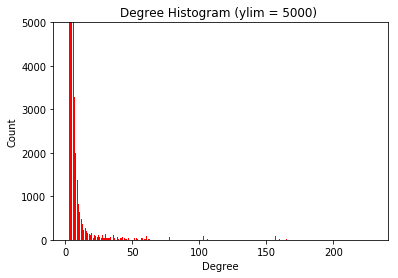

In [38]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#deg 

plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
plt.bar(deg, cnt, color = 'r')
#, width=0.80, color='b'
plt.title("Degree Histogram (ylim = 5000) ")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_ylim([0,5000])
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.show()

    Note that this graph has been cut at count of 4000

We can see a steep drop with a flat tail.

Using a log-log representation of the degree distribution we get:

<Figure size 1080x720 with 0 Axes>

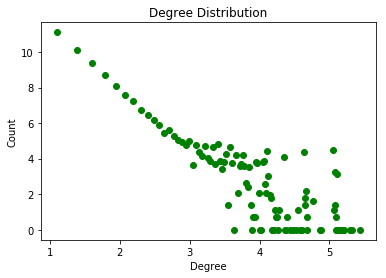

In [39]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
plt.scatter(np.log(deg), np.log(cnt),color = 'g')
#, width=0.80, color='b'
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_ylim([0,2000])
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.show()

As you can see the network seems to be following the power law because the log-log is a straight line. At the end it deviates from the straight line. This is probably because we have limited distribution of degrees (it doesn't go up to infinity).

**Problem 4.3(g)**

In [143]:
print( 'Number of connected components:', len(list(nx.connected_components(G))))

Number of connected components: 36098


**Problem 4.3(h)**

In [40]:
cooff.setdiag(0)
cooff.eliminate_zeros()
G=nx.from_scipy_sparse_matrix(cooff)
G.remove_nodes_from(list(nx.isolates(G)))
largest_cc = max(nx.connected_component_subgraphs(G), key=len)
largest_cc
print( 'Number of nodes in the largest connected component:', len(largest_cc))
#largest_cc.degree()

/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Number of nodes in the largest connected component: 19924


**Problem 4.3(i)**

We will now see the degrees of the nodes and plot it's distribution both as a histogram and in log-log

In [145]:
G.degree(largest_cc)

DegreeView({524292: 4, 524294: 7, 524295: 9, 262159: 5, 17: 2, 524305: 4, 262163: 13, 131092: 41, 655401: 2, 655403: 1, 262198: 2, 524343: 3, 655414: 3, 131132: 56, 262206: 3, 655429: 2, 524367: 1, 262224: 1, 262233: 2, 655453: 1, 655461: 4, 655469: 4, 524401: 29, 655480: 10, 524409: 1, 524411: 3, 131198: 15, 393347: 9, 393361: 2, 131225: 28, 393373: 6, 655520: 2, 393379: 1, 655525: 1, 655533: 1, 655536: 5, 393392: 2, 524468: 4, 524472: 4, 524490: 2, 393427: 4, 524500: 1, 524502: 1, 655574: 6, 393430: 24, 393439: 1, 524513: 5, 524515: 5, 524524: 1, 524527: 1, 524528: 2, 393458: 1, 393463: 1, 655610: 1, 655611: 9, 524555: 3, 393485: 2, 524559: 5, 524562: 6, 524574: 2, 393506: 2, 524579: 1, 524582: 2, 524584: 17, 524586: 1, 309: 1, 524620: 2, 262478: 1, 655709: 3, 393568: 2, 524644: 11, 524646: 2, 524649: 3, 524651: 2, 524658: 2, 393611: 4, 524691: 3, 524692: 4, 524693: 3, 524694: 4, 393623: 59, 262547: 3, 524700: 1, 524707: 2, 419: 1, 655807: 4, 524741: 5, 524743: 1, 524745: 2, 655825: 

<Figure size 1080x720 with 0 Axes>

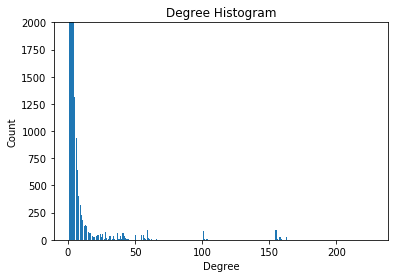

In [146]:
import collections
degree_sequence = sorted([d for n, d in G.degree(largest_cc)], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
plt.bar((deg),(cnt))
#, width=0.80, color='b'
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_ylim([0,2000])
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.show()

<Figure size 1080x720 with 0 Axes>

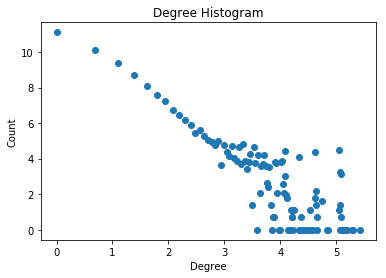

In [147]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
plt.scatter(np.log(deg), np.log(cnt))
#, width=0.80, color='b'
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_ylim([0,2000])
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.show()

In [148]:
#average_degree = sum(G.degree(largest_cc).values())/len(G.degree(largest_cc))

We can see that it is a steeply decreasing distribution with a flat tail. A log-log shows that it follows power law till the end (because of not having enough data points to go to infinity). 

The distribution of this largest connected component seems quite similar to the distribution of the network as a whole so we can use this as representative of the network for analysis.

The largest connected component potentially reflects the largest criminal network we can see.

**Problem 4.3(j)**

In [149]:
print( 'Density of the component: ', nx.density(largest_cc))

Density of the component:  0.0003556454848657796


In [150]:
print( 'Clustering (unweighted): ', nx.average_clustering(largest_cc))

Clustering (unweighted):  0.4784259694538959


In [151]:
print( 'Clustering (weighted): ', nx.average_clustering(largest_cc, weight='weight'))

Clustering (weighted):  0.006007783646767325


In [152]:
#nx.diameter(largest_cc)
print ('Diameter:', 48)

Diameter: 48


We can see here that the largest component has high clustering : 48%(unweighted). This means that if A and B have committed crimes together and B and C have committed crimes together, its 48% likely that A and C have also committed crime together *at least once*. 
This suggests a good closeness between members of the network.

However if we look at weighted clustering the value reduces significantly. This means that A and B could have been caught together many times while B and C been caught together only a few times. This means the probability A and C will be caught together is quite low.

The diameter is 48 in a network of 20,000 nodes. This means that the furthest separated members of this network are separated by 46 nodes between them. Again this suggests that the network is a large criminal network, with many branches (density is low). 

**Problem 4.3(k)**

In [153]:
cooffendyouth=cooffend[(cooffend['Jeunes']>0) & (cooffend['Adultes']==0) ]
#df[(df['A']>0) & (df['B']>0) & (df['C']>0)]
print('Number of crimes committed by youngsters without an adult:', len(cooffendyouth))

Number of crimes committed by youngsters without an adult: 0


This is a surprising result: No crime is such that only youngsters are caught. This could be due to some sampling bias or just something very fascinating. 

First lets see if there are more adults or more youth in crimes where they are both present.

**Problem 4.3(l)**

In [154]:
offendyouth=cooffend[(cooffend['Jeunes']>0) ]
print ('When Youths and Adults are both involved in a crime: ')
print ('Average Youths :', offendyouth['Jeunes'].mean())
print ('Average Adults :',offendyouth['Adultes'].mean())


When Youths and Adults are both involved in a crime: 
Average Youths : 1.4771567649991202
Average Adults : 2.8064629640490293


This is an interesting result. This means most of the times multiple adults are there with fewer youth. This could be that seniors in a gang are "training" juniors. This could also be because an adult would not go with multiple juniors for risk of someone messing up.

Let us now try to look at types of crime which have both adults and youths

In [155]:
print('Total number of crimes:', len(offendyouth))

Total number of crimes: 17051


In [156]:
(offendyouth['NCD1'].value_counts()).head()



21201    1606
21203    1110
21405    1074
1430     1038
21409     982
Name: NCD1, dtype: int64

The most common crimes are:

'INTRO PAR EFFR. DANS RES.' (code: 21201, count: 1606, almost 10%)

'INTRO EF. ETA. COM. PUBL.' (code: 21203, count: 1110)

'VOL 5000$ - A L''ETALAGE' (code: 21405, count: 1074)

This suggests that some crimes turn up a significantly greater number of times than others so very specific crimes are committed by youth and adult.

The most common crime committed by youths is 'Breaking into a residence'. It would be interesting to think of why this is the most common crime.

**Problem 4.3(m)**

I will first analyse which criminals have low degree but high eigen centrality. This means they themselves have committed few crimes but are associated with people who have committed high crimes.
This could help us prevent these people from joining networks of seasoned criminals. We could also use them to gain information on these seasoned criminals.

low degree and high eigen_centrality
municiplaty of highest degree
which areas have more crime